<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Merge_bands_RGB_NIR_and_SWIR_of_BigEarthNet_using_Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Resding Raster with stats 
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html


In [72]:
!pip install rasterio

In [73]:
import rasterio

In [74]:
#Plot Bands https://automating-gis-processes.github.io/CSC18/lessons/L6/plotting-raster.html
from rasterio.plot import show
from rasterio.plot import show_hist

In [75]:
#Create RGB 432 bands geotiff and 83 & 12 bands geotiff

In [76]:
#read Band 2 Blue
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif'
data_band2 = rasterio.open(path)
print(data_band2.dtypes)
print(type(data_band2))
print(data_band2.shape)

('uint16',)
<class 'rasterio.io.DatasetReader'>
(120, 120)


In [77]:
#read band 3 Green
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif'
data_band3 = rasterio.open(path)

In [78]:
#Read band 4 REd
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif'
data_band4 = rasterio.open(path)

In [79]:
# Read band 12 SWIR
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif'
data_band12 = rasterio.open(path)

In [80]:
# Read band 8 NIR
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif'
data_band8 = rasterio.open(path)

	Band 2 Blue


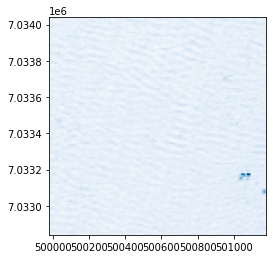

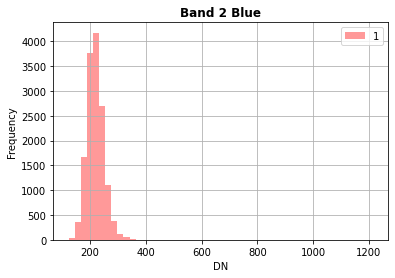

In [81]:
print('\tBand 2 Blue')
show(data_band2,cmap='Blues')
show_hist(data_band2,title='Band 2 Blue',bins=50,histtype='stepfilled',alpha=0.4)

	 Band 3 Green


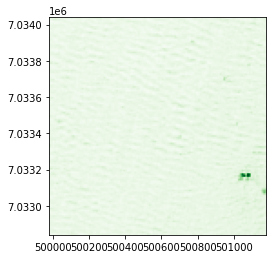

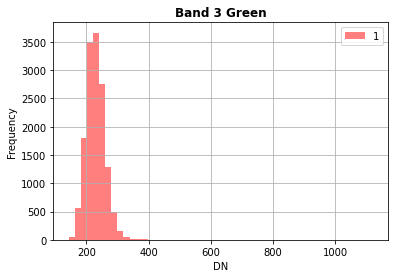

In [82]:
print('\t Band 3 Green')
show(data_band3,cmap='Greens')
show_hist(data_band3,title='Band 3 Green',bins=50,histtype='stepfilled',alpha=0.5)

	 Band 4 Red


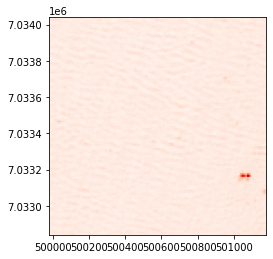

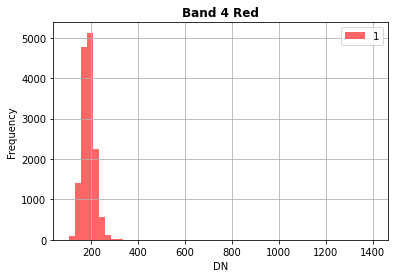

In [83]:
print('\t Band 4 Red')
show(data_band4,cmap='Reds')
show_hist(data_band4,title='Band 4 Red',histtype='stepfilled',bins=50,alpha=0.6)

	 Band 8 NIR


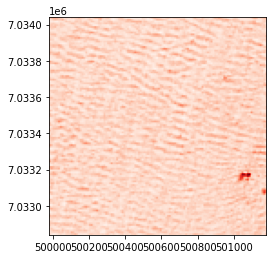

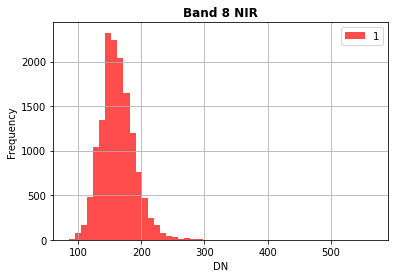

In [84]:
print('\t Band 8 NIR')
show(data_band8,cmap='Reds')
show_hist(data_band8,title='Band 8 NIR',bins=50,histtype='stepfilled',alpha=0.7)

	 Band 12 SWIR


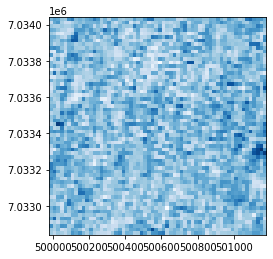

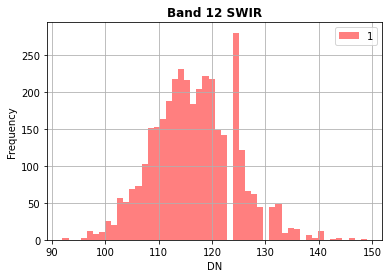

In [85]:
print('\t Band 12 SWIR')
show(data_band12,cmap='Blues')
show_hist(data_band12,bins=50,title='Band 12 SWIR',histtype='stepfilled',alpha=0.5)

# **Create Mosaic**

In [86]:
#https://gis.stackexchange.com/questions/223910/using-rasterio-or-gdal-to-stack-multiple-bands-without-using-subprocess-commands
import os
import glob
from rasterio import merge
import pandas as pd

In [87]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55'
search = '*B*.tif'
files_batch = glob.glob(os.path.join(path,search))
print(files_batch)
print(len(files_batch))

['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B8A.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B11.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T1

<open DatasetWriter name='/content/drive/MyDrive/Big/stack.tif' mode='w'>
1 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif
2 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif
3 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif
4 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif
5 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B8A.tif
6 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif
7 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif
8 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B11.tif
9 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif
10 /content/drive

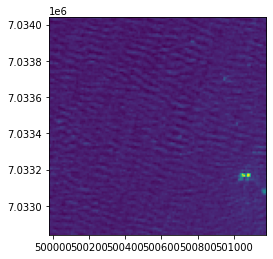

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 120, 'height': 120, 'count': 12, 'crs': CRS.from_epsg(32634), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 7034040.0)}


In [88]:
# Read metadata of first file
with rasterio.open(files_batch[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers in merged output geotiff file
meta.update(count = len(files_batch))

# Read each layer and write it to stack
with rasterio.open('/content/drive/MyDrive/Big/stack.tif', 'w', **meta) as dst:
    print(dst)
    for id, layer in enumerate(files_batch, start=1): #list of tuples
        print(id,layer)
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1)) #read 1 band at a time
stacked_data = rasterio.open('/content/drive/MyDrive/Big/stack.tif')
print('Output geotiff number of bands',stacked_data.count)
show(stacked_data)
print(stacked_data.meta)


In [89]:
#read all 12 bands of stack.tif
min=[]
max=[]
mean=[]
path = '/content/drive/MyDrive/Big/stack.tif'
with rasterio.open(path) as src:
  data_array = src.read()
  print("Shape of Geotiff source",data_array.shape)
  print("Band stats:--> \n")
  for id,band in enumerate(data_array,start=1):
    print("min of band",id,band.min())
    min.append(band.min())
    print("max of band",id,band.max())
    max.append(band.max())
    print("mean of band",id,band.mean())
    mean.append(band.mean())
    print("\n")

Shape of Geotiff source (12, 120, 120)
Band stats:--> 

min of band 1 143
max of band 1 1122
mean of band 1 230.33770833333332


min of band 2 108
max of band 2 515
mean of band 2 157.0402777777778


min of band 3 103
max of band 3 1401
mean of band 3 187.04756944444443


min of band 4 123
max of band 4 1215
mean of band 4 219.92625


min of band 5 106
max of band 5 446
mean of band 5 150.79666666666665


min of band 6 92
max of band 6 149
mean of band 6 116.59972222222223


min of band 7 85
max of band 7 567
mean of band 7 162.6045138888889


min of band 8 106
max of band 8 161
mean of band 8 131.05805555555557


min of band 9 109
max of band 9 174
mean of band 9 130.4725


min of band 10 109
max of band 10 588
mean of band 10 158.9338888888889


min of band 11 126
max of band 11 778
mean of band 11 180.19611111111112


min of band 12 267
max of band 12 456
mean of band 12 284.155




In [90]:
df=pd.DataFrame()
df['min'] = min
df['max'] = max
df['mean'] = mean
df

,min,max,mean
0,143,1122,230.337708
1,108,515,157.040278
2,103,1401,187.047569
3,123,1215,219.926250
4,106,446,150.796667
5,92,149,116.599722
6,85,567,162.604514
7,106,161,131.058056
8,109,174,130.472500
9,109,588,158.933889


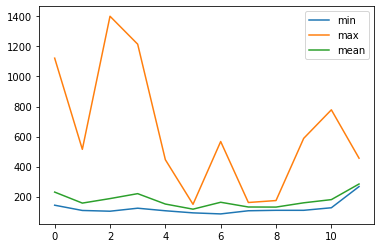

In [91]:
df.plot()

# Raster calculations like NDVI on NIR(8) &  RED(4) **bands**

In [92]:
import numpy as np

In [93]:
#open multi-band geotiff stacked file stack.tif (12 bands when read using raster dta array object)
#https://automating-gis-processes.github.io/CSC18/lessons/L6/raster-calculations.html
path = '/content/drive/MyDrive/Big/stack.tif'
data_stack = rasterio.open(path)
data_stack.shape

(120, 120)

In [94]:
#read bands NIR 8 & RED 4
red = data_stack.read(4)
nir = data_stack.read(8)

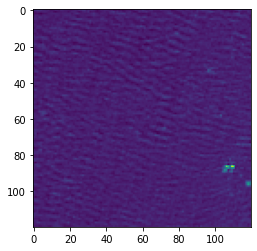

(120, 120)

In [95]:
show(red)
type(red)
red.shape

In [96]:
red

array([[286, 280, 304, ..., 227, 248, 221],
       [182, 196, 220, ..., 193, 259, 231],
       [164, 162, 173, ..., 201, 214, 225],
       ...,
       [204, 221, 273, ..., 224, 247, 253],
       [216, 207, 211, ..., 244, 183, 219],
       [182, 189, 195, ..., 230, 200, 240]], dtype=uint16)

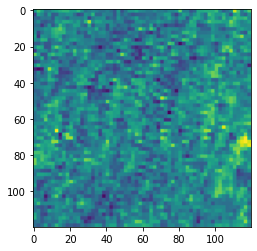

(120, 120)

In [97]:
show(nir)
type(nir)
nir.shape

In [98]:
nir

array([[135, 135, 145, ..., 138, 146, 146],
       [135, 135, 145, ..., 138, 146, 146],
       [117, 117, 137, ..., 123, 134, 134],
       ...,
       [126, 126, 128, ..., 152, 134, 134],
       [126, 126, 122, ..., 137, 129, 129],
       [126, 126, 122, ..., 137, 129, 129]], dtype=uint16)

In [99]:
nir = nir.astype(float)
nir

array([[135., 135., 145., ..., 138., 146., 146.],
       [135., 135., 145., ..., 138., 146., 146.],
       [117., 117., 137., ..., 123., 134., 134.],
       ...,
       [126., 126., 128., ..., 152., 134., 134.],
       [126., 126., 122., ..., 137., 129., 129.],
       [126., 126., 122., ..., 137., 129., 129.]])

In [100]:
red = swir.astype(float)
red

array([[278., 278., 278., ..., 287., 287., 287.],
       [278., 278., 278., ..., 287., 287., 287.],
       [278., 278., 278., ..., 287., 287., 287.],
       ...,
       [272., 272., 272., ..., 298., 298., 298.],
       [272., 272., 272., ..., 298., 298., 298.],
       [272., 272., 272., ..., 298., 298., 298.]])

In [101]:
#Allow 0 division in numpy
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [102]:
#Now we need to initialize the ndvi with zeros before we do the calculations (this is numpy specific trick)

ndvi=np.empty(data_stack.shape,dtype=rasterio.float32)
ndvi

array([[1.70209981e+35, 3.07613039e-41, 6.38527925e+31, ...,
        3.13685916e+15, 1.05522906e-08, 3.50960720e+12],
       [1.88883078e+31, 1.15240094e+33, 3.40979859e+27, ...,
        1.51509552e+01, 6.53183747e-07, 1.22073612e+01],
       [2.03170521e+34, 1.63301212e+10, 1.02605487e+15, ...,
        8.88252657e-07, 8.87395231e-07, 8.72494297e-07],
       ...,
       [6.23612355e+10, 1.61078491e+13, 4.82531201e+27, ...,
        6.76458318e+22, 3.19835025e+06, 3.51289528e+12],
       [1.45860948e+13, 1.19489696e-05, 4.24976831e+21, ...,
        1.42322946e+34, 1.11540926e+24, 2.72558188e+26],
       [8.44815488e+08, 7.68584198e-13, 3.80680300e+06, ...,
        5.58985248e+31, 8.63924488e-10, 4.10614075e+27]], dtype=float32)

In [103]:
#Now we are ready to calculate the NDVI. First, we can create a filter where we calculate the values on such pixels that have a value larger than 0.
check = np.logical_or(nir>0,red>0)

In [111]:
#Now we can apply that filter and calculate the ndvi index
ndvi = np.where(check, (red - nir)/(nir + red),-999)
ndvi

array([[0.34624697, 0.34624697, 0.3144208 , ..., 0.35058824, 0.3256351 ,
        0.3256351 ],
       [0.34624697, 0.34624697, 0.3144208 , ..., 0.35058824, 0.3256351 ,
        0.3256351 ],
       [0.40759494, 0.40759494, 0.33975904, ..., 0.4       , 0.36342043,
        0.36342043],
       ...,
       [0.36683417, 0.36683417, 0.36      , ..., 0.32444444, 0.37962963,
        0.37962963],
       [0.36683417, 0.36683417, 0.38071066, ..., 0.37011494, 0.39578454,
        0.39578454],
       [0.36683417, 0.36683417, 0.38071066, ..., 0.37011494, 0.39578454,
        0.39578454]])

In [112]:
ndvi.mean()

0.368723383744346

In [113]:
ndvi.std()

0.026771233602524324

In [114]:
ndvi.min()

0.2744186046511628

In [115]:
ndvi.max()

0.5944055944055944

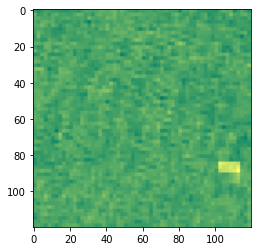

In [116]:
show(ndvi,cmap='summer')

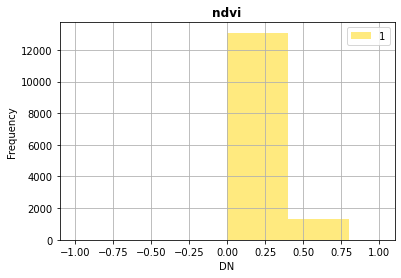

In [117]:
show_hist(ndvi,bins=[-1,-0.6,-0.2,0,0.4,0.8,1],histtype='stepfilled',title='ndvi',alpha=0.5)